# <center>Laboratory 4<br>Computing methods</center>

**Instruction:**  
All the exercises from the laboratory must be implemented in [Spyder] (https://www.spyder-ide.org/). The report must be sent in [Jupyter Notebook] (https://jupyter-notebook.readthedocs.io/en/stable/)  


***Preparation materials:***
- IEEE754 standard [EN](https://en.wikipedia.org/wiki/IEEE_754)
- Floating point number [EN](https://en.wikipedia.org/wiki/Floating-point_arithmetic)
- Floating point arithmetic [Python](https://docs.python.org/3.7/tutorial/floatingpoint.html)

***Exercise 1.***  
Calculate the relative and absolute error of the $p$ approximation with $p^{*}$:
 
  
1. $p=\pi,\ p^{*}=\frac{22}{7}$  
2. $p=\textrm{e},\ p^{*}=2.718$  
3. $p=10^{\pi},\ p^{*}=1397$  
4. $p=9!,\ p^{*}=\sqrt{18\pi}\Big(\frac{9}{\textrm{e}}\Big)^9$  

In [1]:
import math
def absolute(a, approx_a):
    return math.fabs(a-approx_a)
def relative(a, approx_a):
    return absolute(a, approx_a)/a


In [2]:
print("pi and approx pi, absolute: {}, relative: {}".format(absolute(math.pi, 22/7), relative(math.pi, 22/7)))
print("e and approx e, absolute: {}, relative: {}".format(absolute(math.e, 2.718), relative(math.e, 2.718)))
print("10^pi and approx 10^pi, absolute: {}, relative: {}".format(absolute(10**math.pi, 1397), relative(10**math.pi, 1397)))
print("9! and approx 9!, absolute: {}, relative: {}".format(absolute(math.factorial(9), math.sqrt(18*math.pi)*(9/math.e)**9), relative(math.factorial(9), math.sqrt(18*math.pi)*(9/math.e)**9)))

pi and approx pi, absolute: 0.0012644892673496777, relative: 0.0004024994347707008
e and approx e, absolute: 0.0002818284590451192, relative: 0.00010367889601972718
10^pi and approx 10^pi, absolute: 11.544268632989315, relative: 0.008332470227394952
9! and approx 9!, absolute: 3343.1271580516477, relative: 0.009212762230080598


***Exercise 2.***  
The number $\textrm{e}$ can be defined as $\sum\limits_{n=0}^{\infty}\frac{1} {n!}$. Calculate the relative and absolute error of the $\textrm{e}$ via  approximation  $\textrm{e}^{*} $ when:
  
1. $\textrm{e}^{*}=\sum\limits_{n=0}^{5} \frac{1}{n!}$    
2. $\textrm{e}^{*}=\sum\limits_{n=0}^{10} \frac{1}{n!}$  

In [3]:
def approx_e(N):
    return sum([1/math.factorial(n) for n in range(N)])
e_5 = approx_e(5)
e_10 = approx_e(10)
print("approx e = {} for N=5, approx e = {} for N=10".format(e_5, e_10))
print("e and approx e for N = 5, absolute: {}, relative: {}".format(absolute(math.e, e_5), relative(math.e, e_5)))
print("e and approx e for N = 10, absolute: {}, relative: {}".format(absolute(math.e, e_10), relative(math.e, e_10)))


approx e = 2.708333333333333 for N=5, approx e = 2.7182815255731922 for N=10
e and approx e for N = 5, absolute: 0.009948495125712054, relative: 0.003659846827343768
e and approx e for N = 10, absolute: 3.0288585284310443e-07, relative: 1.1142547828265698e-07


***Exercise 3.***  
If we know:  
$\begin{aligned}
\sum_{n=1}^{\infty} \cfrac{1}{n^2} = \cfrac{1}{6} \pi^2
\end{aligned}$,  
write a one-liner code in Python that calculates the approximation of pi (do not use the *numpy.pi*, *math.pi* etc.). What kinds of numerical errors are we dealing with?

In [4]:
N = 1000
approx_pi = math.sqrt(sum([6/(n**2) for n in range(1, N)])) 
approx_pi

3.1406371009859377

We are dealing (mainly) with cut-off error (constrained N value). Moreover some (most, actually) decimal fractions cannot be represented exactly as binary (base 2) fractions, so we are also dealing with representation error for every fraction in sum. Next values in sum decreasing relatively quick, we're adding smaller and smaller values. We may deal with computation error connected with "fading" small values added to big ones.

***Exercise 4.***  
The values of the function $\mathrm{e}^{x} $ can be calculated from the Taylor series in the following way:  
  
$\mathrm{e}^{x} \approx \sum\limits_{i=0}^{N}{\cfrac{1}{i!}x^{i}}$  
  
on the basis of the information provided, write a function which calculates $ \mathrm{e}^{x} $ with the given accuracy. Compare the action of the created function with *[numpy.exp](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.exp.html)*

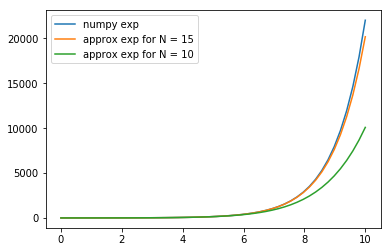

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def approx_e_x(x, N):
    return sum([x**n/math.factorial(n) for n in range(N)])
N=15
N2 = 10
x = np.linspace(0,10)
plt.figure()
plt.plot(x, np.exp(x))
plt.plot(x, approx_e_x(x, N))
plt.plot(x, approx_e_x(x, N2))
plt.legend(["numpy exp", "approx exp for N = {}".format(N), "approx exp for N = {}".format(N2)])
#print("approx e^x = {} for N=5, approx e^x = {} for N=10".format(e_5, e_10))
#print("e^x and approx e^x for N = 5, absolute: {}, relative: {}".format(absolute(math.e, e_5), relative(math.e, e_5)))

***Exercise 5.***  
Find the smallest positive value <i> b </ i> for which the following code will print the correct result. On this basis, specify the number of mantissa bits of the default floating point type in Python. What kind of numerical error and what stage are we dealing with?

In [6]:
a = 1.0
b = 1.0
i = 1
while (a + 0.5 * b) != a:
    i+=1
    b = 0.5 * b
print(a+b-a-b)
print("Mantissa bits {}".format(i))

0.0
Mantissa bits 53


In [7]:
import sys
b = sys.float_info.epsilon
print(a+b-a-b)
print("Mantissa bits {}".format(sys.float_info.mant_dig))

0.0
Mantissa bits 53


After each operation (addition, subtraction) the result is rounded, so after calculations we get a different result. But for machine zero 1.0 +- machine zero is still 1.0 - the result of operations is mathematical correct.

In [8]:
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

Supplementary materials:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Uncle  Google](https://google.pl) i [auntie Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)